# 🌍 Population Distribution Analysis (1960–2023)

This project explores global population trends using World Bank data.  
As part of my internship Task-01, the objective is to visualize the distribution of a continuous variable — population — using a bar chart and histogram.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load main data and metadata
df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_76253/API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv', skiprows=4)
meta_df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_76253/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv')

# Clean column names
df.columns = df.columns.str.strip()
meta_df.columns = meta_df.columns.str.strip()

# Filter only real countries using metadata
valid_country_codes = meta_df[meta_df['Region'].notna()]['Country Code'].tolist()
df_clean = df[df['2022'].notna() & df['Country Code'].isin(valid_country_codes)]
df_clean = df_clean.sort_values(by='2022', ascending=False)

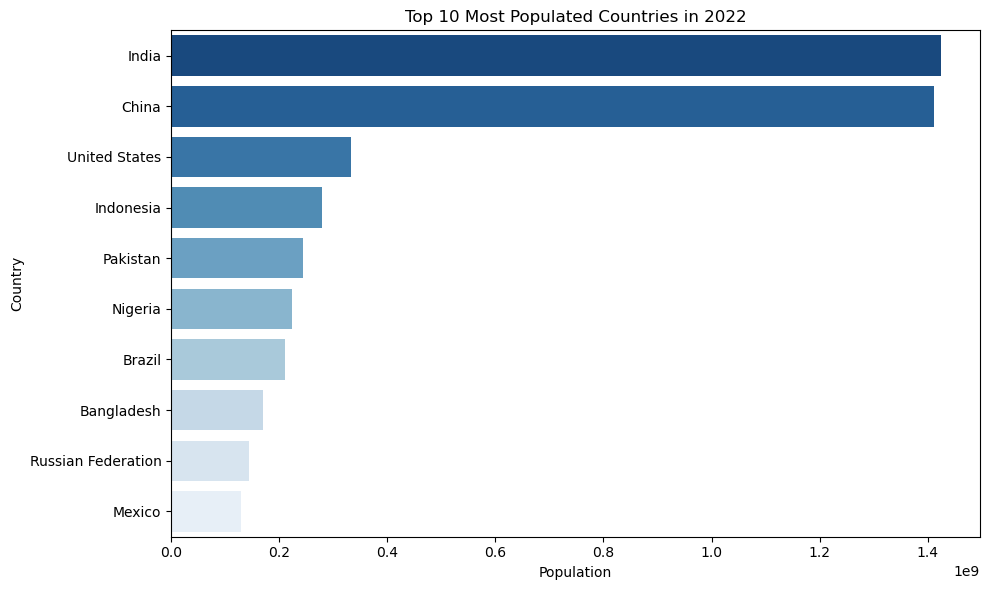

In [3]:
# Top 10 populated countries
top10 = df_clean.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='2022', y='Country Name', data=top10, palette='Blues_r')
plt.title('Top 10 Most Populated Countries in 2022')
plt.xlabel('Population')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


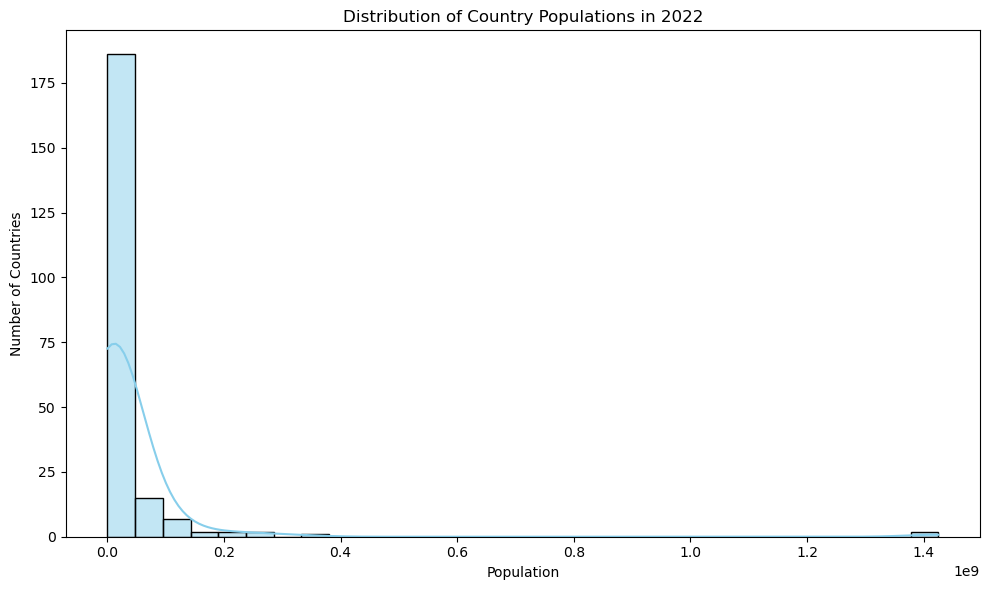

In [4]:
# Histogram of all countries
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['2022'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Country Populations in 2022')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()

### 🔍 Key Insights:
- India and China have crossed 1.4 billion people.
- The majority of countries have populations below 100 million.
- The global population distribution is highly skewed, with a few countries holding a large share.
